In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import numpy as np
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Reading the dataset

In [69]:
df = pd.read_csv("E:\\dev_work\\python_projects\\xgb\\input\\MvsR.csv")

### Number of rows and columns

In [70]:
df.shape

(208, 61)

In [71]:
df['target'] = df['target'].map({'M': 1, 'R': 0})

In [106]:
df.head(2)

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v52,v53,v54,v55,v56,v57,v58,v59,v60,target
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.014,0.0049,0.0052,0.0044,0


### Class breakup

In [109]:
print ('ROCK % ',round(df['target'].value_counts()[0]/len(df)*100,2))
print ('MINE % ',round(df['target'].value_counts()[1]/len(df)*100,2))

ROCK %  46.63
MINE %  53.37


### Separation of input variables from target variable

In [79]:
feature_names = df.iloc[:, 0:len(df.columns)-1].columns
target = df.iloc[:0, len(df.columns)-1:].columns


data_features = df[feature_names]
data_target = df[target]

In [80]:
feature_names

Index(['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11',
       'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21',
       'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'v29', 'v30', 'v31',
       'v32', 'v33', 'v34', 'v35', 'v36', 'v37', 'v38', 'v39', 'v40', 'v41',
       'v42', 'v43', 'v44', 'v45', 'v46', 'v47', 'v48', 'v49', 'v50', 'v51',
       'v52', 'v53', 'v54', 'v55', 'v56', 'v57', 'v58', 'v59', 'v60'],
      dtype='object')

In [81]:
target

Index(['target'], dtype='object')

In [82]:
from sklearn.model_selection import train_test_split
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(data_features, data_target, 
                                                    train_size = 0.70, test_size = 0.30, random_state = 1)

# XGBoost

In [83]:
xg = xgb.XGBClassifier()

In [84]:
xg.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [85]:
def PrintStats(cmat, y_test, pred):
    tpos = cmat[0][0]
    fneg = cmat[1][1]
    fpos = cmat[0][1]
    tneg = cmat[1][0]

In [86]:
def RunModel(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train.values.ravel())
    pred = model.predict(X_test)
    matrix = confusion_matrix(y_test, pred)
    return matrix, pred

In [87]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import scikitplot as skplt

In [88]:
cmat, pred = RunModel(xg, X_train, y_train, X_test, y_test)

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

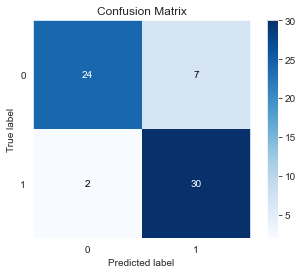

In [89]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, pred)

In [90]:
accuracy_score(y_test, pred)

0.8571428571428571

In [91]:
print (classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.77      0.84        31
           1       0.81      0.94      0.87        32

    accuracy                           0.86        63
   macro avg       0.87      0.86      0.86        63
weighted avg       0.87      0.86      0.86        63



In [92]:
from sklearn import metrics          

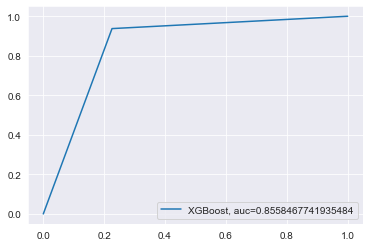

In [93]:
# Creating XGBoost model
clf = xgb.XGBClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# AUC Curve XGBoost
y_pred_probability = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, pred)
auc = metrics.roc_auc_score(y_test, pred)
plt.plot(fpr,tpr,label="XGBoost, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Logistic Regression

In [94]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [95]:
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

# Predict
y_pred=logreg.predict(X_test)

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

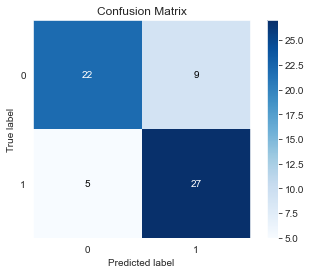

In [96]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

In [97]:
accuracy_score(y_test, y_pred)

0.7777777777777778

In [98]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.71      0.76        31
           1       0.75      0.84      0.79        32

    accuracy                           0.78        63
   macro avg       0.78      0.78      0.78        63
weighted avg       0.78      0.78      0.78        63



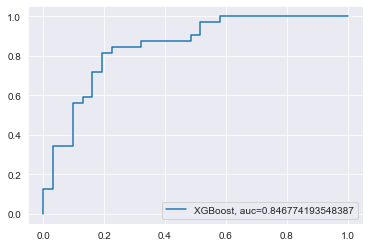

In [99]:
# AUC Curve XGBoost
y_pred_probability = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_probability)
auc = metrics.roc_auc_score(y_test, y_pred_probability)
plt.plot(fpr,tpr,label="XGBoost, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Bagging Classifier

In [100]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

In [101]:
clf = BaggingClassifier(base_estimator=SVC(),
                        n_estimators=10, random_state=0).fit(X_train,y_train)

In [102]:
BC_Pred = clf.predict(X_test)

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

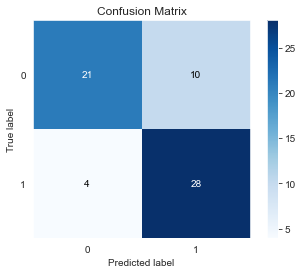

In [103]:
skplt.metrics.plot_confusion_matrix(y_test, BC_Pred)

In [104]:
accuracy_score(y_test, BC_Pred)

0.7777777777777778

In [105]:
print (classification_report(y_test, BC_Pred))

              precision    recall  f1-score   support

           0       0.84      0.68      0.75        31
           1       0.74      0.88      0.80        32

    accuracy                           0.78        63
   macro avg       0.79      0.78      0.77        63
weighted avg       0.79      0.78      0.78        63

